# Predicting sale prices of houses - Part A

This notebook presents the study of predicting sale prices of houses, which is offered as a kaggle project.The available file of training data ('train.csv') includes 80 features of houses and their corresponding selling prices('SalePrice').
The main steps of the project are as follows:

a) Identifying the most relevent features that effect the sale price of the house

b) Modify the data as needed to fit the model that we are going to use.

c) Use basic regression model to predict the housing prices and determine the accuracy.


We start the project by importing 'os' and 'pandas' modules. 

In [39]:
import os

import pandas as pd

We are going to import train data and store in a DataFrame.We will use this data set to train and test our models. 

In [40]:
df_train=pd.read_csv(os.path.join('data set','train.csv'))

Checking the shape,column names and summary statistics

In [41]:
print("The shape of train data:", df_train.shape)
print("\nThe column names:",df_train.columns)
print("\nSale Price statistic sumary:",df_train['SalePrice'].describe())

The shape of train data: (1460, 81)

The column names: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Gara

Using searborn visualization library to plot the distribution plot of the target feature ('SalePrice')

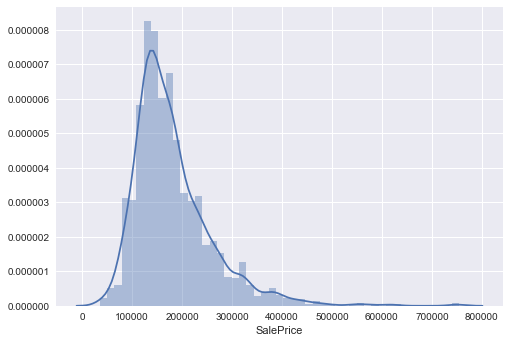

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_train['SalePrice'])
plt.show()

Calculating skewness(measure of a symmentry of distribution) and kurtosis(sharpness of the distribution peak) for target feature

In [6]:
from scipy.stats import skew,kurtosis

skewness= skew(df_train['SalePrice'])
kurt=kurtosis(df_train['SalePrice'])
print("\nThe Saleprice data has skewness :%s and kurtosis: %s"%(skewness,kurt))


The Saleprice data has skewness :1.880940746034036 and kurtosis: 6.509812011089439


using 'df_train.shape' we learnt that the provided data set has 80 features.(81st feature is 'SalePrice', which is the target feature).To understand the most corelated features with the 'SalePrice', a correlated matrix is plotted.

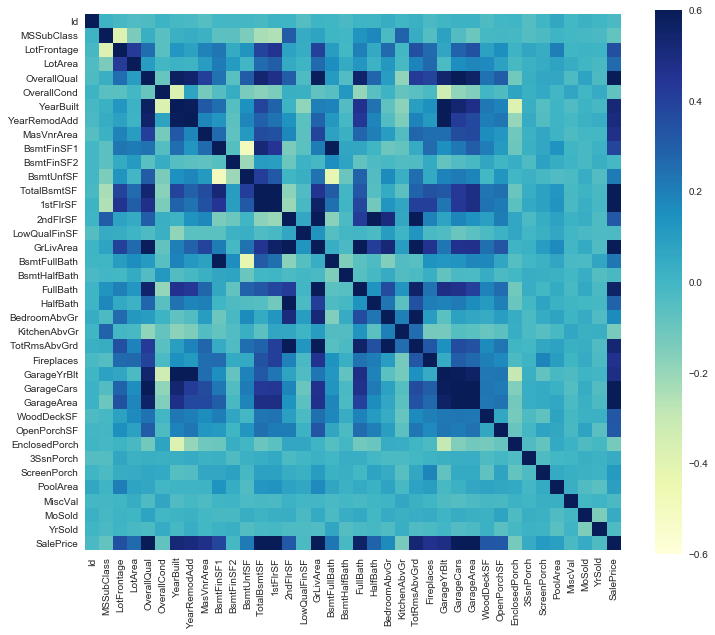

In [12]:
correlation=df_train.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation,vmax=0.6,square=True,cmap="YlGnBu")
plt.show()


The next step is to find the highest corelated features to the target variable ('SalePrice')

In [43]:
k=10 # selecting 10 hhighest values

cols=correlation.nlargest(n=k,columns='SalePrice')['SalePrice'].index # getting highly correlated features

correlation_zoom=correlation.loc[cols,cols.values.T]# slicing rows and columns to create 2D DataFrame with highly corelated features

ploting the zoomed corelation matrix

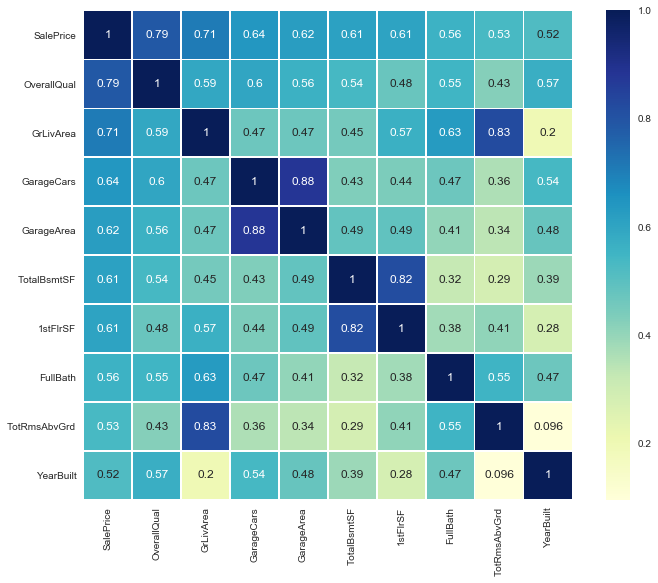

In [44]:
plt.subplots(figsize=(12,9))

sns.heatmap(correlation_zoom,annot=True,square=True,xticklabels=cols.values,
            yticklabels=cols.values,linewidths=.5,cmap="YlGnBu")  # annot =True writes the values on each cell in the correlation matrix

plt.show()

ploting a detailed pirplot with each feature

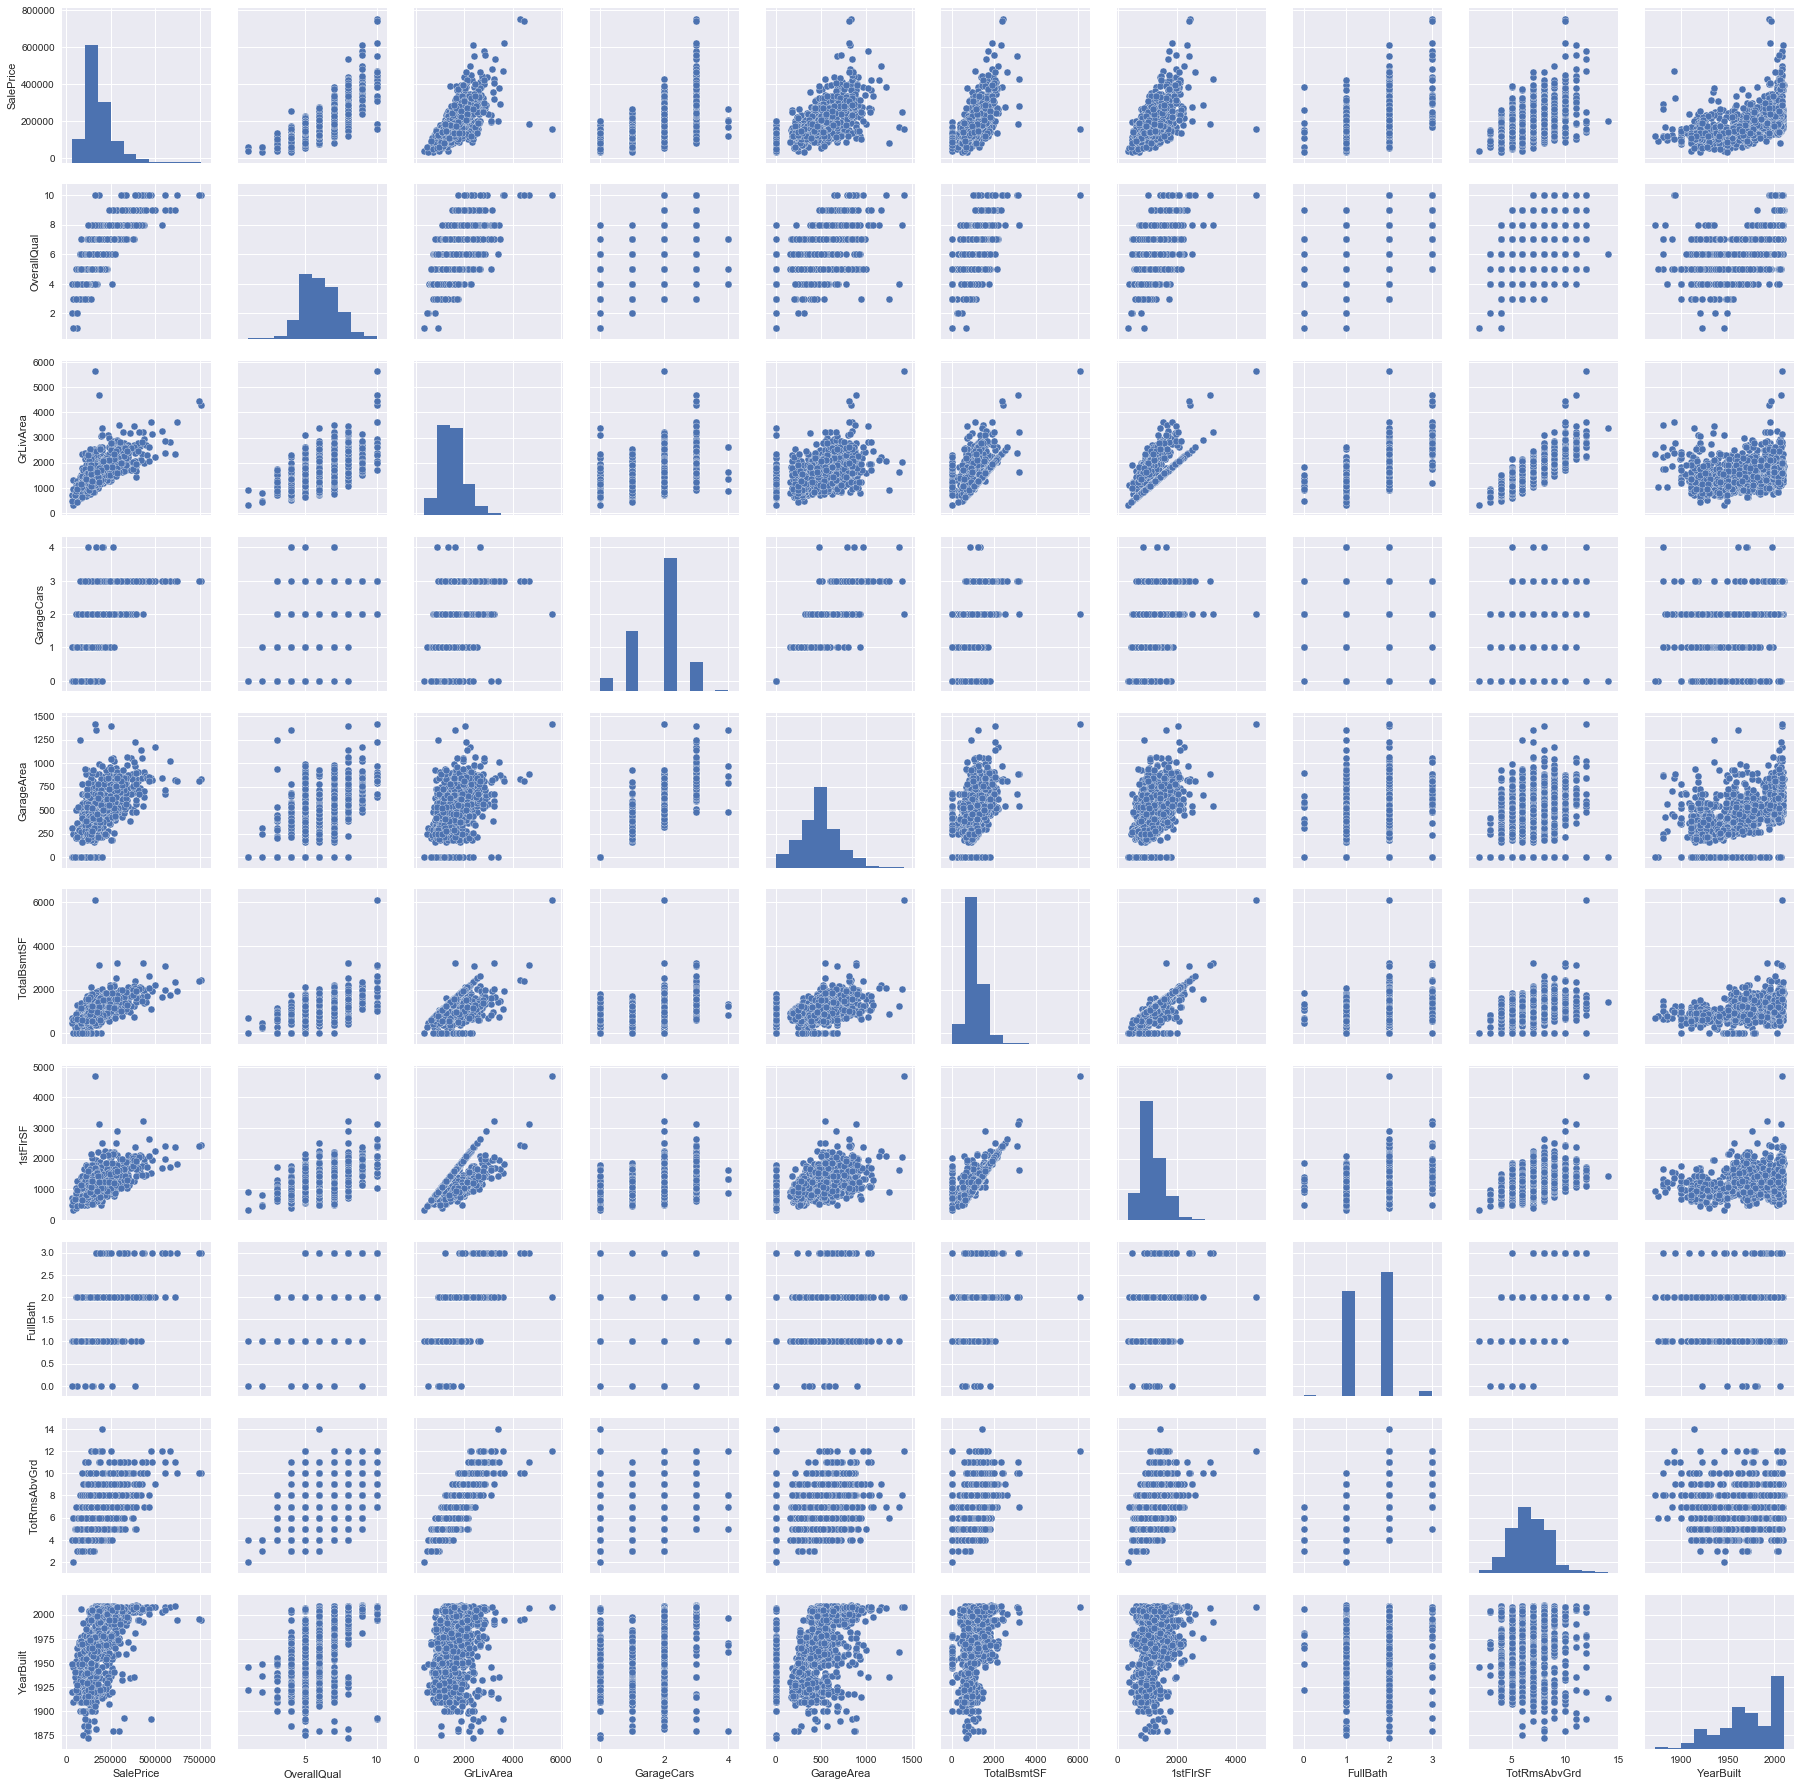

In [15]:
sns.pairplot(df_train[cols])

plt.show()


The first column (or first row) represents the pair plots of 'SalePrice' against each feature.As we can see some features are numerical and others are categorical. 

#  Dealing with missing data

Calculate the sum of missing data points for each feature,list them in descending order.

In [16]:
missing_data_total=df_train.isnull().sum().sort_values(ascending=False)

print(missing_data_total[missing_data_total>0]) # The features with at least a single missing data value.

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


None of the features with missing data are listed as a highly correlated feature according to our earlier calculations.Therefore, all the features with at least a single missing data are going to be deleted.

In [17]:
df_train = df_train.drop((missing_data_total[missing_data_total > 0]).index,1)



Checking whether we have a single entry with a null value.

In [18]:
print("The null values in modified df_train:",df_train.isnull().sum().max())

The null values in modified df_train: 0


# Processing training and testing data

First assign 'SalePrice' values to  target data(y).Then assign the data from highest correlated matrix into training data.

In [19]:
y_train=df_train['SalePrice']
cols=cols.drop('SalePrice')# removing the label column from the selected columns (higher correlation)
train_data=df_train[cols] # getting data from the most corelated columns

Convert all the numerical data in the traing set to normal by using log(feature+1).This will eliminate the skewness.

In [20]:
import numpy as np

num_columns=train_data._get_numeric_data().columns

train_data=np.log1p(train_data[num_columns])


# spliiting  data into train and test data

Although the real kaggle project has testing data to submit the predictions, here I'm going to use the provided traing data  split into training(70%) and testing(30%).In this way, we can test the accuracy of the trained model just by using the provided traing data.

plitting the data into training and testing.

In [21]:
from sklearn.cross_validation import train_test_split


X_train,X_test,y_train,y_test =train_test_split(train_data,y_train,test_size=0.3,random_state=0)

C:\Users\Madusanka\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Using models

We are using LinearRegression classifier from Sci-kit learn module to train the model.

In [22]:
from sklearn.linear_model import LinearRegression

slr=LinearRegression()
slr.fit(X_train,y_train)

y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

Since we are using multiple features for training, we can't use regular 2D plot to visualize the accuracy of our model.Alternatively,we are going to use residual plots (the difference between actual and predicted values) against 'SalePrice'.

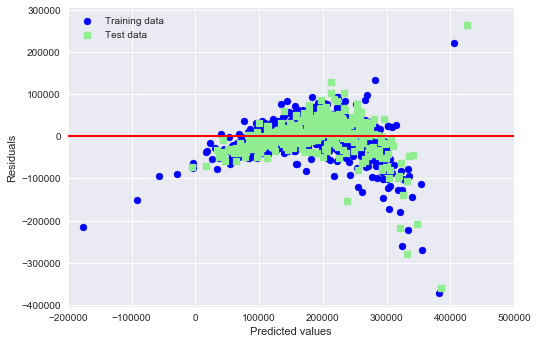

In [23]:
fig, ax =plt.subplots()

plt.scatter(y_train_pred,y_train_pred-y_train, c='blue',marker='o', label='Training data')# residuals of traing data in blue
plt.scatter(y_test_pred,y_test_pred-y_test, c='lightgreen',marker='s',label='Test data')# residuals of testing data in green

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200000,xmax=500000,lw=2,color='red') # plotting the y=0 line in red to indicate the residuals=0 reference.
plt.xlim([-200000,500000])
plt.show()

The final step is to calculate the accuracy in model training and testing.I used 'coefficient of determination (R^2)' for each case.(This is a normalized version of 'root mean square error (rmse)'). 

In [33]:
from sklearn.metrics import r2_score

print(f'\nR^2 train:',r2_score(y_train,y_train_pred))
print(f'\nR^2 test:', r2_score(y_test,y_test_pred))



R^2 train: 0.730275534657

R^2 test: 0.707664843787


# References

<html>
<body>

<ul style="list-style-type:disc">
 <p> <li>Raschka et al., 2015, Python Machine Learning, 1st Edition (https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka-ebook/dp/B00YSILNL0)</li> </p>
  
 <p> <li>Marcelino et al., 2017,Comprehensive data exploration with Python (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)</li></p>
  
  <p><li>Papiu et al., 2017,Regularized Linear Models (https://www.kaggle.com/apapiu/regularized-linear-models)</li></p>
</ul>  

</body>
</html>